<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2)-Root-Mean-Squared-Error---10-Pts" data-toc-modified-id="2)-Root-Mean-Squared-Error---10-Pts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2) Root Mean Squared Error - 10 Pts</a></span><ul class="toc-item"><li><span><a href="#a)-Implement-Root-mean-square-error---2-Pts" data-toc-modified-id="a)-Implement-Root-mean-square-error---2-Pts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>a) Implement Root mean square error - 2 Pts</a></span></li><li><span><a href="#b)-Calculate-RMSE-for-different-polynomials---3-Pts-(2-Pts-+-1-Pt)" data-toc-modified-id="b)-Calculate-RMSE-for-different-polynomials---3-Pts-(2-Pts-+-1-Pt)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>b) Calculate RMSE for different polynomials - 3 Pts (2 Pts + 1 Pt)</a></span></li><li><span><a href="#c)-Compare-RMSE-on-subset-of-data---2-Pts-(1Pt-+-1Pt)" data-toc-modified-id="c)-Compare-RMSE-on-subset-of-data---2-Pts-(1Pt-+-1Pt)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>c) Compare RMSE on subset of data - 2 Pts (1Pt + 1Pt)</a></span></li><li><span><a href="#d)-Compare-RMSE-on-train/test-split---3-Pts" data-toc-modified-id="d)-Compare-RMSE-on-train/test-split---3-Pts-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>d) Compare RMSE on train/test split - 3 Pts</a></span></li></ul></li></ul></div>

# 2) Root Mean Squared Error - 10 Pts

This week, we will be using the functions for polynomial regression you implemented last time
and compare how different parametrization of our regression leads to approximations of different qualities.

For convenience, the notebook provides all the functions you have implemented last week in a concise manner so you can get to work on the new tasks right away. For more details and comments, please refer to last week's solution.

We will use the same data we have used last week (poly_data.csv), which is already loaded and stored in variables X and Y in the notebook.

In [1]:
# the usual imports
import sys # new one, for error messages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# short definitions of all the functions from the last homework.
def poly_dm(x,m):
    ϕ = np.ones((len(x), m+1))
    for i in range(1, m+1):
        ϕ[:, i] = x**i
    return ϕ

def pseudoinverse(A):
    return np.dot( np.linalg.inv( np.dot(A.T, A)), A.T)

def poly_regress(x, y, deg):
    ϕ = poly_dm(x, deg)
    pseudo = pseudoinverse(ϕ)
    return np.dot(pseudo,y)

def polynom(x, w):
    y = 0
    for i in range(len(w)):
        y += w[i]*(x**i)        
    return y

# importing the same data, store in X and Y
X, Y = np.loadtxt('poly_data.csv', delimiter=',')

# the target function
def target_func(x):
    return 1.5*np.sin(x) - np.cos(x/2) + 0.5

## a) Implement Root mean square error - 2 Pts

First, we need a way to qualify how good the polynomial function we have obtained approximates the
underlying target function. One common way to quantify this is the [**r**oot-**m**ean-**s**quared **e**rror](https://en.wikipedia.org/wiki/Root-mean-square_deviation) of a approximated (for example via regression) target values $\hat{y}$ and true samples from the target function $y$:
\begin{equation}
\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{N}\sum^{N}_{i=1}(y_i-\hat{y}_i)^2}
\end{equation}
Here, N simply denotes the count, i.e. how many data samples we are comparing. 

In [3]:
def rmse(y, yhat):
    sum = 0
    for i in range(len(y)):
        sum += (y[i]-yhat[i])**2

    return (sum/len(y))**(1/2)

# the lines below test the correctness of the RMSE function:
try:
    print('RMSE:','Looks alright!'if 2==rmse(np.array((1,2)),np.array((3,4)))else'Results did not match!')
except:
    print('RMSE: Your code has produced and error message: ')
    print(sys.exc_info())

RMSE: Looks alright!


## b) Calculate RMSE for different polynomials - 3 Pts (2 Pts + 1 Pt)
Let's apply our new error measure to a small experiment, where we test degrees $m \in \{1, 2, ..., 10\}$ and how well
a polynomial regression with degree m approximates our target function! Train different polynomials models with degree *m* on the training data we loaded into **X** and **Y**. Now, let's use the fact that we have access to the perfect underlying function y **target_func** - this is usually not the case. To do this, we take new values x and evaluate both our regression polynom as well as the target function y at these values and compare with the RMSE!

Create a vector of new inputs **x** that holds 100 linearly spaced values between 0 and 10. Evaluate
the target function at these new x values, so we can compare our regression results later!

Create an array **error** that can hold the error value for each of the different test cases. (you could also use a python list and append)

For each value of m do:
1. Train a polynomial model (w from poly_regress); ! use **X** and **Y**, loaded from poly_data.csv
1. Evaluate the polynomial at inputs **x** and store the result in **y_hat**
1. Calculate the RMSE between **y** and **y_hat**; store the error in the **error** array (y doesn't change for different m!)

Then plot the results in a plot: degree m as the x-axis, the corresponding error on the y-axis. Underneath the cell with your code, describe what you are seeing in 1-2 sentences **max** using the markdown cell (simply double click the text!).

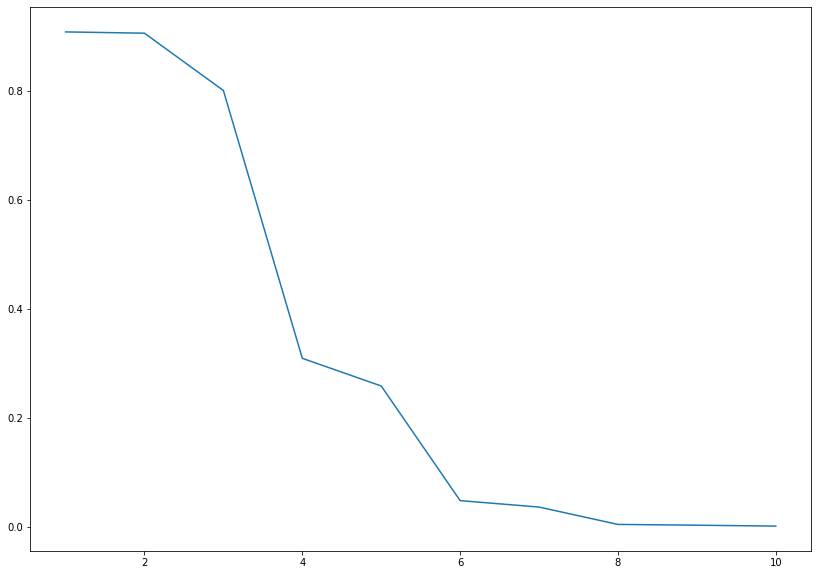

In [4]:
x = np.linspace(0, 10, 100)
y = target_func(x)
m = np.linspace(1,10,10).astype(int)

# The error array
error = np.zeros((len(m)))

for i in m:

    y_hat = polynom(x, poly_regress(x,y,i))
    error[i-1] = rmse(y, y_hat)
        

plt.figure(figsize=(14, 10))
plt.plot(m,error)


### What does the plot describe?

The plot shows how the RMSE decreases with increasing degree m. We see the biggest error decrease between the 3rd and 4th degree and not much change after the 6th degree, in fact it appears as if using a degree higher than 8, will not further reduce the error, while the variance still increases.

## c) Compare RMSE on subset of data - 2 Pts (1Pt + 1Pt)

Repeat what you have done in b), but this time only use the first 20 samples in **X** and **Y** for training! The resulting plot of errors looks different, why is that? Put your answer in the markdown cell below the code block!

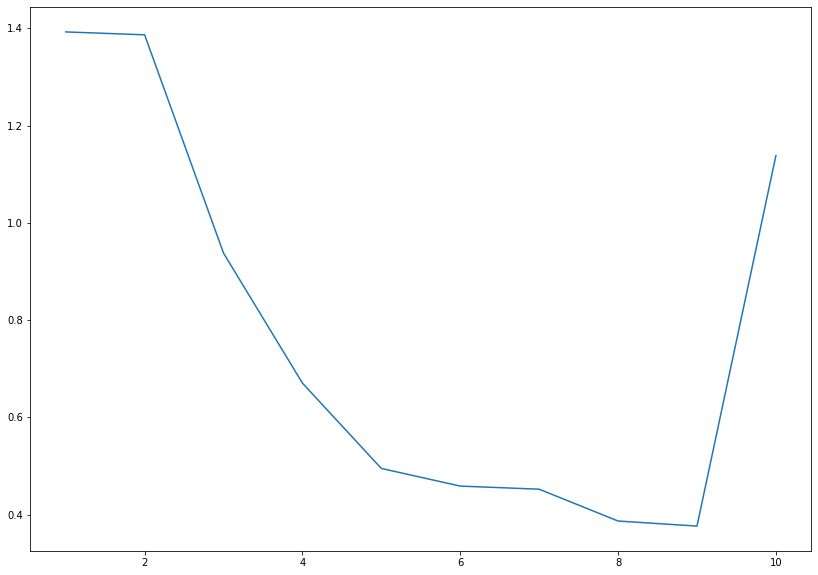

In [5]:
# number of samples
sample_size = 20

# x and y are defined in the previous block.

# first 20 samples
X_subsampled = X[0:sample_size]
Y_subsampled = Y[0:sample_size]

# The error array, different name
error_sub = np.zeros((len(m)))

for i in m:

    Yhat_subsampled = polynom(X_subsampled, poly_regress(X_subsampled,Y_subsampled,i))
    error_sub[i-1] = rmse(Y_subsampled, Yhat_subsampled)
    
plt.figure(figsize=(14, 10))
plt.plot(m,error_sub)



### This plot looks different because:

First of all the errors are higher overall. Before the RMSE was around 0.001 and 0.9, now it is between 0.35 and 1.4. This is because this time the model was fitted to the noisy training data instead of the target function, so it of course is further away from the target function.

Second the error rapidly increases for a degree of 10. This is a clear sign of overfitting to the training data.

## d) Compare RMSE on train/test split - 3 Pts

As we do not have access to underlying functions that generate the data we observe in practice, we cannot apply the method above and use all data points to train a regression, fit the polynomial, and then simply generate new data to test the model.

To make the scenario a little more realistic, we will now only use the provided data from poly_data.csv. The first 50 data points in **X** and **Y** will be used for training, the later 50 for testing. Store the corresponding arrays in variables **X_train**, **Y_train**, **X_test**, **Y_test** and repeat the previous procedure with this 50/50 split for training and testing data for each polynomial [1, ..., 10].

Note, that instead of generating new samples from the underlying function and testing against those, we will evaluate the polynomial on **X_test** and compare to **Y_test**. Again, plot your results!


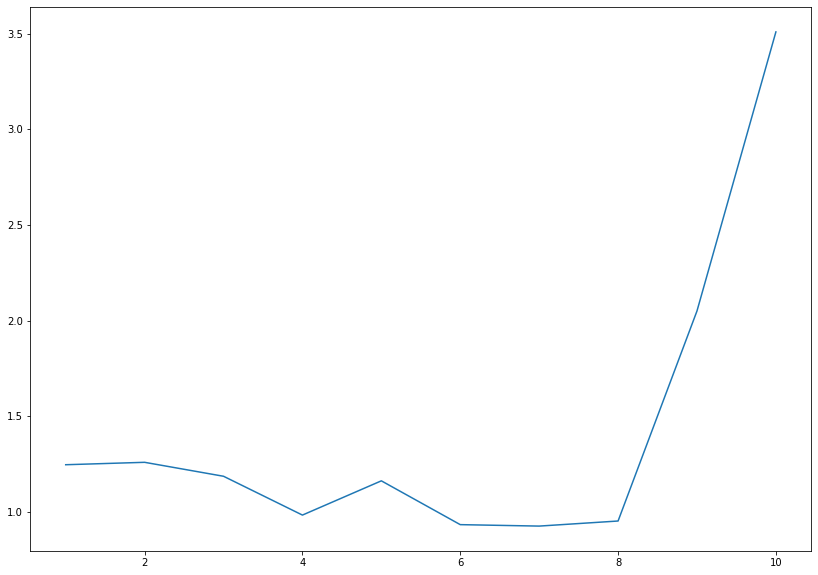

In [6]:
# first 50, last 50
X_train = X[0:50]
X_test = X[50:100]

# the same for the depenent variable
Y_train = Y[0:50]
Y_test = Y[50:100]

# The error array, different name
error_train_test = np.zeros(len(m))

for i in m:
    Y_hat = polynom(X_test, poly_regress(X_train,Y_train,i))
    error_train_test[i-1] = rmse(Y_test, Y_hat)

plt.figure(figsize=(14, 10))
plt.plot(m,error_train_test)